### Problem Statement:
#### Create a model based off of this sample that will allow them to assess.
#### Where and in which into which companies they want to invest to achieve their goal of maximizing profit.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [3]:
NewData = pd.read_csv('50_Startups.csv')
NewData.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Statistical Describe of the dataset

In [4]:
NewData.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Checking For Missing Data

In [5]:
NewData.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Checking Outlier

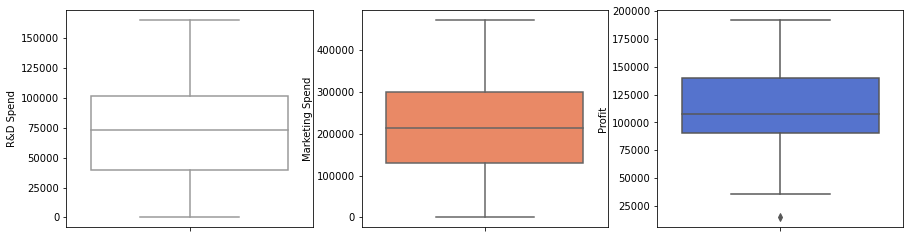

In [6]:
fig, g = plt.subplots(1, 3, figsize=(15,4))
g1 = sns.boxplot(data =NewData, y= 'R&D Spend',color = 'white',ax= g[0]);
g2 = sns.boxplot(data =NewData, y = 'Marketing Spend',color = 'coral',ax= g[1]);
g3 = sns.boxplot(data =NewData, y = 'Profit',color = 'royalblue',ax= g[2]);


### Outlier Removal

In [7]:
def outlier_detection(NewData):
  Q1 = NewData.quantile(0.25)
  Q3 = NewData.quantile(0.75)
  IQR = Q3 - Q1
  pos = Q3 + 1.5*IQR
  neg = Q1 - 1.5*IQR
  outlier = NewData[(NewData > pos) | (NewData < neg)]
  return outlier

In [8]:
outlier_detection(NewData['Profit'])

49    14681.4
Name: Profit, dtype: float64

In [9]:
df = NewData.drop([49])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        49 non-null     float64
 1   Administration   49 non-null     float64
 2   Marketing Spend  49 non-null     float64
 3   State            49 non-null     object 
 4   Profit           49 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


### Spliting the Dataset to Dependent and Independent

In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [11]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [12]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
Name: Profit, dtype: float64

### Encoding the Categorical Column

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [14]:
X = x[:, 1:] # Avoiding Dummy Variable Trap

In [15]:
print(x)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04
  3.6286136e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05
  1.2771682e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05
  3.2387668e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05
  3.1161329e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05
  3.0498162e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05
  2.2916095e+05]
 [1.0000000e+00 0.000

### Spliting into Training and Test Data

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , train_size=0.7, random_state=2)

In [17]:
x_train.shape

(34, 6)

In [18]:
y_train.shape

(34,)

### Training the Multiple Linear Regression on Train Set

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Predicting the Test Set Results

In [20]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)

In [21]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[108888.55 108733.99]
 [128416.29 141585.52]
 [ 74212.83  71498.49]
 [118747.22 126992.93]
 [ 89546.38  96479.51]
 [ 71519.08  65200.33]
 [ 53608.62  42559.73]
 [129485.27 134307.35]
 [149043.9  132602.65]
 [187450.95 192261.83]
 [177110.85 191050.39]
 [154335.3  149759.96]
 [129345.51 125370.37]
 [100598.6   99937.59]
 [106228.49 107404.34]]


In [25]:
regressor.coef_

array([ 1.75e+03, -6.02e+02, -1.15e+03,  7.72e-01,  1.29e-02,  1.94e-02])

In [24]:
regressor.intercept_

50109.258874592015